# Predicting Air Quality Index (AQI) Using Supervised Regression:A Comprehensive Approach

Air pollution poses a significant threat to both human health and the environment,as it involves the presence of harmful substances in Earth's atmosphere. These pollutants can take various forms, primarily gases and mixtures of solid or liquid particles in the air, leading to potential adverse effects on human well-being.

As an Aspiring Data Scientist, I embarked on a project focused on developing a precise and reliable model for estimating the Air Quality Index (AQI) using Machine Learning Algorithms. The AQI serves as a vital indicator to gauge air pollution levels in specific regions and its impacts on both humanity and the surrounding environment.

To accomplish this project, I utilized my data analysis and model development skills, with a keen emphasis on understanding the key factors influencing air quality and its overall environmental implications. I collected a comprehensive dataset comprising various environmental parameters ad meterological factors, such as particulate matter(PM2.5, PM10), harmfull gases emittied by vechicles and industries such as NO2, NOx, SO2, CO, O3, Benzene, Toluene, Xylene etc which potentialy affects the air quality and cause several health issues.

This developed AQI estimation model has the potential to assist in making informed decisions, implementing effective policies, and promoting actions that lead to better air quality and a healthier living environment for all.

# Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Import the Data

In [2]:
data= pd.read_csv('city_day.csv')#Have assigned variable for Dataframe as 'data' and import csv file(i.e AQI data) using pandas

# EDA(Exploratory Data Anaysis)

To get insights from the data and visualize the key insights

In [3]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Lets Check the Null values

In [4]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**Totally there are 29531 rows and 16 columns(Features)**

**In this Data Only City and Date Features has all non-null values,remaining all features has lot of missing values**

# Lets Look into List of Cities

In [6]:
cities= data["City"].unique() # by using unique() to check the unique values present in the city columns
print("Unique Cities:",cities)#shows unique cities
print("Total Number of Unique Cities:",len(cities)) # count the numer of cities present in 'data'

Unique Cities: ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
Total Number of Unique Cities: 26


In [7]:
data['City'].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

# checking the missing values in terms of percentage 

In [8]:
null_values=pd.DataFrame({
    'Null counts': data.isnull().sum(), # Gives the counts of missing values in each columns
    'Null Percentage' : (data.isnull().sum()/ len(data) *100).map('{:.2f}%'.format) # Gives the percentage of the null values 
})

print(null_values)

            Null counts Null Percentage
City                  0           0.00%
Date                  0           0.00%
PM2.5              4598          15.57%
PM10              11140          37.72%
NO                 3582          12.13%
NO2                3585          12.14%
NOx                4185          14.17%
NH3               10328          34.97%
CO                 2059           6.97%
SO2                3854          13.05%
O3                 4022          13.62%
Benzene            5623          19.04%
Toluene            8041          27.23%
Xylene            18109          61.32%
AQI                4681          15.85%
AQI_Bucket         4681          15.85%


# FEATURE ENGINEERING

In our dataset there are lot of missing points ,especially Xylene has the highest missing values followed by PM10 and also other values

So fill the missing values with the mean

But, due to geographical and meteorological factors we can't normally fill the missing values with over all mean.

because of this reason, I choose to fill with the averaged mean for each city. So, it will maintain the order of missing values and minimize the disortion of data


In [9]:
avg_by_city = data.groupby('City').transform('mean') # Reference from stack overflow
#group the data by city and calculate the mean of each city seperately by using transform function
avg_by_city.describe()

C:\Users\Mohamed Arshad\AppData\Local\Temp\ipykernel_27052\2483272358.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  avg_by_city = data.groupby('City').transform('mean') # Reference from stack overflow
C:\Users\Mohamed Arshad\AppData\Local\Temp\ipykernel_27052\2483272358.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  avg_by_city = data.groupby('City').transform('mean') # Reference from stack overflow


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,27522.000000,29531.000000,29531.000000,28362.000000,27522.000000,29531.000000,29531.000000,29369.000000,26799.000000,25521.000000,16484.000000,29531.000000
mean,66.234841,116.228087,18.226745,28.641768,32.855058,23.024137,2.602122,15.639939,34.329319,3.263615,8.276830,3.114350,169.486556
std,31.709480,47.911677,10.974596,13.766171,15.903958,14.939010,5.321265,12.596644,8.656062,4.349671,8.197117,2.215617,95.183460
min,17.130000,23.352857,0.917092,0.388496,1.002202,2.813625,0.239675,3.184051,3.707692,0.009138,0.000359,0.008010,34.765766
25%,41.130242,83.243287,9.409136,16.857623,19.717092,11.988493,0.663049,8.392101,32.443816,1.571172,2.595666,1.438339,105.352258
50%,55.468335,114.584029,15.233330,27.995042,29.377311,18.371518,1.067349,9.949676,33.611005,2.887419,5.780711,2.623059,133.679159
75%,109.714059,126.747958,26.846916,37.193188,45.952471,29.322199,1.838634,15.901253,37.523747,3.891348,10.370938,5.385581,225.123882
max,123.498562,232.809229,71.771625,59.025496,68.412901,63.452612,22.193407,55.253733,59.851036,38.432563,38.658406,7.356062,452.122939


**Now check our original dataset**

In [10]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


**In Avg_by_city Vs Original 'Data' frame there is a difference in mean values**

In [11]:
data['PM2.5'].fillna(avg_by_city['PM2.5'].mean(), inplace=True)
data['PM10'].fillna(avg_by_city['PM10'].mean(), inplace=True)
data['NO'].fillna(avg_by_city['NO'].mean(), inplace=True)
data['NO2'].fillna(avg_by_city['NO2'].mean(), inplace=True)
data['NOx'].fillna(avg_by_city['NOx'].mean(), inplace=True)
data['NH3'].fillna(avg_by_city['NH3'].mean(), inplace=True)
data['CO'].fillna(avg_by_city['CO'].mean(), inplace=True)
data['SO2'].fillna(avg_by_city['SO2'].mean(), inplace=True)
data['O3'].fillna(avg_by_city['O3'].mean(), inplace=True)
data['Benzene'].fillna(avg_by_city['Benzene'].mean(), inplace=True)
data['Toluene'].fillna(avg_by_city['Toluene'].mean(), inplace=True)
data['Xylene'].fillna(avg_by_city['Xylene'].mean(), inplace=True)
data['AQI'].fillna(avg_by_city['AQI'].mean(), inplace=True)

data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.261287,117.410736,17.653817,28.570506,32.386491,23.322829,2.273247,14.676574,34.469352,3.277560,8.585482,3.097246,166.942757
std,59.416111,71.506878,21.360281,22.941066,29.318555,20.712528,6.716356,16.913207,20.163520,14.226365,17.035816,3.932485,129.069070
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,116.228087,11.530000,25.240000,27.550000,23.024137,0.950000,10.480000,34.329319,1.840000,6.930000,3.114350,138.000000
75%,72.450000,116.228087,18.226745,34.665000,36.015000,23.024137,1.710000,15.639939,42.730000,3.263615,8.276830,3.114350,179.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Plot the AQI of each cities

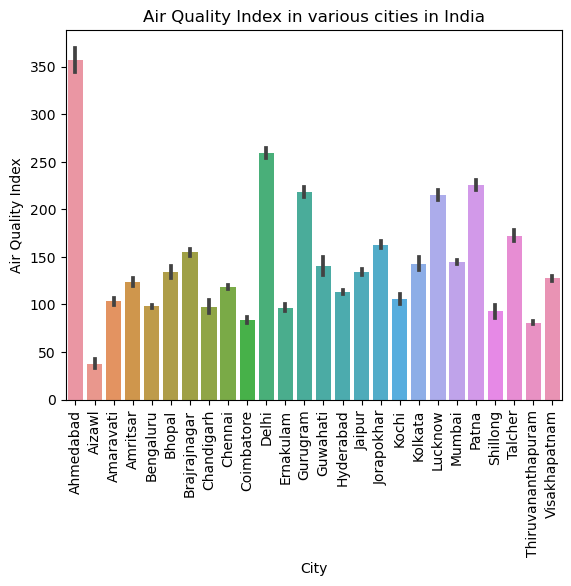

In [12]:
sns.barplot(x='City', y= 'AQI', data=data)
plt.xlabel('City')
plt.ylabel('Air Quality Index')
plt.title('Air Quality Index in various cities in India')
plt.xticks(rotation=90)
plt.show()

**CITY and AQI Bucket features are in categorical type and not in numerical type
So Encode the object data type columns such as Cty and AQI Bucket using label encoder**

In [3]:
data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [13]:
#import the label encoder from scikit learn library
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder() 
data['City']=label.fit_transform(data['City']) #fit and transform to encode the city column 
data['AQI_Bucket']= label.fit_transform(data['AQI_Bucket']) #fit and transform to encode the AQI Bucket column

data['City'].unique() #check the encoded data of city column

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [14]:
data['AQI_Bucket'].unique()

array([6, 2, 5, 4, 1, 3, 0])

# Correlation of the dataset

**With Seaborn heatmap ill correlate our target variable AQI and compare the relationship between them**

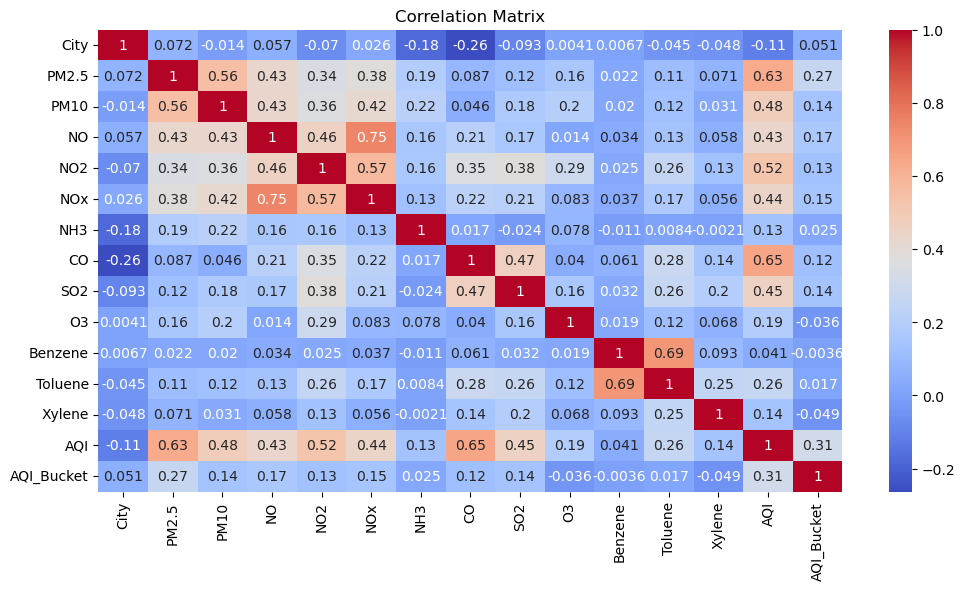

In [15]:
dt=data
correlation=dt.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Our correlated features are low, even the low correlated features can play crucial role

In [16]:
dt= dt.drop(columns='Date')
dt.shape

(29531, 15)

# Developing the Model

**Split data for model building**

Split the data into thte target (y) and features (X)

In [17]:
y=dt['AQI']
X=dt.drop(columns=['AQI'])
print(X.shape)
y.shape

(29531, 14)


(29531,)

# Import the libraries and algorithms to create regression model

In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split  # to select best parameters for each model import gridsearch CV and import train_test
from sklearn.preprocessing import StandardScaler #use this to scale data
from sklearn.linear_model import LinearRegression# basic regression model 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #import ensembling regression algorithms
from xgboost import XGBRegressor #import xgboost regression algorithm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Split the Training and Test data for the X and y(Features and Target)

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23624, 14)
(5907, 14)
(23624,)
(5907,)


## Scale the training and test features

**Use Standard Scaler to rescale the training and test features of data but avoid scaling target variables.**

In [20]:
scaler= StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.shape)
print(scaled_X_test.shape)

(23624, 14)
(5907, 14)


# 1.  Linear Regression Model

In [21]:
linear= LinearRegression()
linear

LinearRegression()

### Training The X_Test ,Y_Test Data In Linear Regression

In [22]:
model_lr=linear.fit(scaled_X_train, y_train) #linearreg doesn't have hyperparameters

### Checking Performance Metrics for Linear Regression

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, explained_variance_score

y_pred_lr=model_lr.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred_lr)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_score= r2_score(y_test, y_pred_lr)
evs= explained_variance_score(y_test,y_pred_lr)

print('Mean Absolute Error for linear Regression:', mae)
print('Root Mean Squared Error for linear Regression:', rmse)
print('Coeffecient of Determination for linear Regression:', r2_score)
print('explained_variance_score for linear regression:', evs)

Mean Absolute Error for linear Regression: 30.586853805809874
Root Mean Squared Error for linear Regression: 53.86290622048168
Coeffecient of Determination for linear Regression: 0.8075685098757814
explained_variance_score for linear regression: 0.8075719482755961


**Our linear regression model performs with nearly ~81% accuracy**


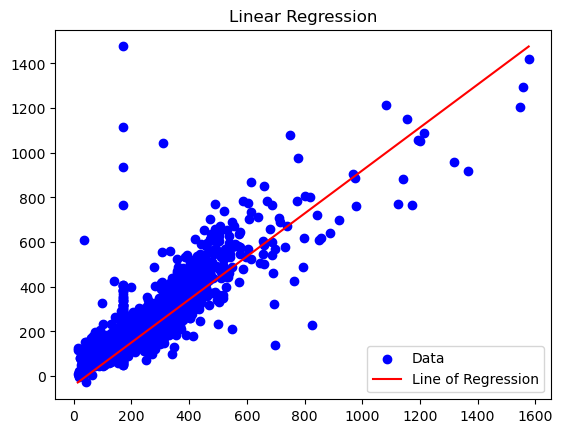

In [24]:
plt.scatter(y_test, y_pred_lr, color='b', label='Data') 
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_pred_lr),np.max(y_pred_lr)], color='r', label='Line of Regression')
plt.title('Linear Regression')
plt.legend()
plt.show()

### Actual vs Predicted Result

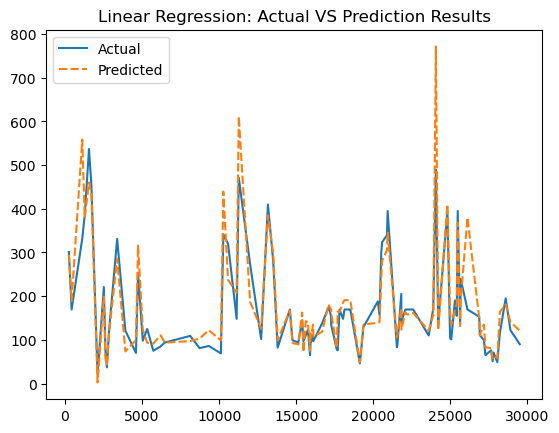

In [25]:
df=pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_lr[:100]})
sns.lineplot(data=df)
plt.title('Linear Regression: Actual VS Prediction Results')
plt.show()

## Random Forest Model

In [26]:
rf= RandomForestRegressor()
rf

RandomForestRegressor()

In [27]:
param_grid_rf={'n_estimators': [100,200,300],
              'max_depth':[None, 5, 10],
              'min_samples_split':[2,5,10]}

In [28]:
rf_grid_search= GridSearchCV(rf, param_grid_rf, cv=5)
model_rf= rf_grid_search

In [29]:
model_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [30]:
rf_best_params = rf_grid_search.best_params_

rf_best_score = rf_grid_search.best_score_

print('Random Forest best parameters:',rf_best_params)
print('Random Forest best score:',rf_best_score)

Random Forest best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest best score: 0.9308474323361882


In [31]:
y_pred_rf=model_rf.predict(scaled_X_test)

mae_rf=mean_absolute_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))
evs_rf= explained_variance_score(y_test,y_pred_rf)

print('Mean Absolute Error of  Random Forest Regression:', mae_rf)
print('Root Mean Squared Error of  Random Forest Regression:', rmse_rf)
print('Coeffecient of Determination of Random Forest Regression:', evs_rf)

Mean Absolute Error of  Random Forest Regression: 12.980868384936658
Root Mean Squared Error of  Random Forest Regression: 26.635711774845216
Coeffecient of Determination of Random Forest Regression: 0.9530651898967274


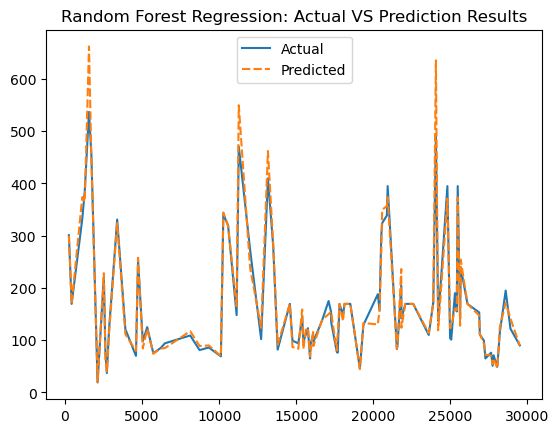

In [32]:
df=pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_rf[:100]})
sns.lineplot(data=df)
plt.title('Random Forest Regression: Actual VS Prediction Results')
plt.show()

## XG Boost Regressor Model

In [33]:
xgb= XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
xgb_param_grid = {'n_estimators':[100,200,300],
                 'learning_rate':[0.1,0.01],
                 'depth':[3,5,7]}

In [35]:
xgb_grid_search=GridSearchCV(xgb, xgb_param_grid, cv=5)
model_xgb= xgb_grid_search

In [36]:
model_xgb.fit(scaled_X_train, y_train)

[00:02:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[00:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[00:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[00:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[00:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "depth" } are not used.

[00:02:05] WARNING: C:\bu

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [37]:
xgb_best_params = xgb_grid_search.best_params_

xgb_best_score = xgb_grid_search.best_score_

print('XGBoost best parameters:',xgb_best_params)
print('XGBoost best score:',xgb_best_score)

XGBoost best parameters: {'depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
XGBoost best score: 0.9256632495125571


In [38]:
y_pred_xgb=model_xgb.predict(scaled_X_test)

mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mean_squared_error(y_test, y_pred_xgb))

evs_xgb= explained_variance_score(y_test,y_pred_xgb)


print('Mean Absolute Error of Cat Boost Regression:', mae_xgb)
print('Root Mean Squared Error of Cat Boost Regression:', rmse_xgb)
print('Coeffecient of Determination of Cat Boost Regression:', evs_xgb)

Mean Absolute Error of Cat Boost Regression: 13.622131458461883
Root Mean Squared Error of Cat Boost Regression: 25.73561524275463
Coeffecient of Determination of Cat Boost Regression: 0.9561115603282893


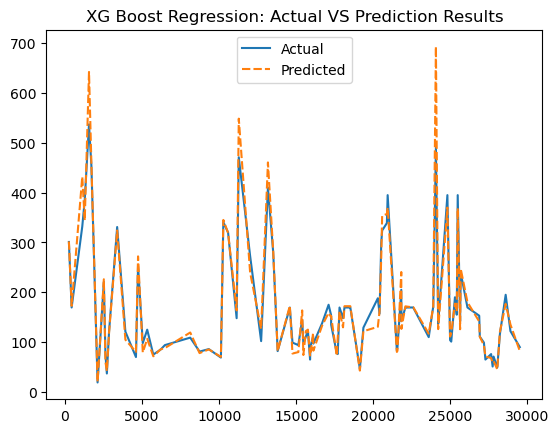

In [39]:
df=pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_xgb[:100]})
sns.lineplot(data=df)
plt.title('XG Boost Regression: Actual VS Prediction Results')
plt.show()

# Gradient Boosting ,KNN Regressor,Support Vector Regressor

In [40]:
svr=SVR()
gb=GradientBoostingRegressor()
knn=KNeighborsRegressor()

In [41]:
models=[svr, gb, knn]
model_names=["SVR", 'Gradient Boosting', 'KNN']
mae_list=[]
rmse_list=[]
evs_list=[]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    #r2s=r2_score(y_test, y_pred)
    evs= explained_variance_score(y_test, y_pred)
    mae_list.append(mae)
    rmse_list.append(rmse)
    evs_list.append(evs)
    print(f'{name}, MAE: {mae}')
    print(f'{name}, RMSE:{rmse}')
    print(f'{name},Explained Variance Score:{evs}')
    print(mae_list)

SVR, MAE: 32.604086254979514
SVR, RMSE:74.15427927893683
SVR,Explained Variance Score:0.6395282555926491
[32.604086254979514]
Gradient Boosting, MAE: 16.15056240678769
Gradient Boosting, RMSE:28.849469166095886
Gradient Boosting,Explained Variance Score:0.9448042771586275
[32.604086254979514, 16.15056240678769]
KNN, MAE: 22.889048462692994
KNN, RMSE:49.34068404783017
KNN,Explained Variance Score:0.8386610852703901
[32.604086254979514, 16.15056240678769, 22.889048462692994]


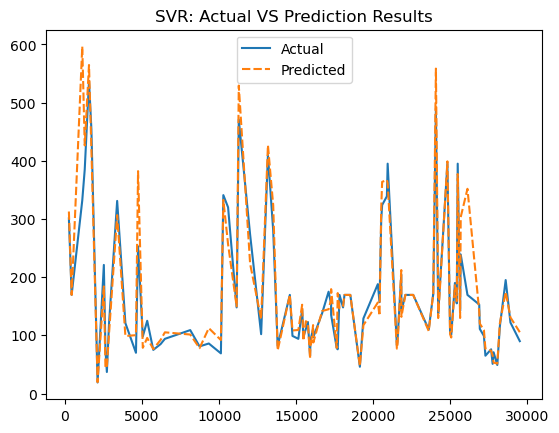

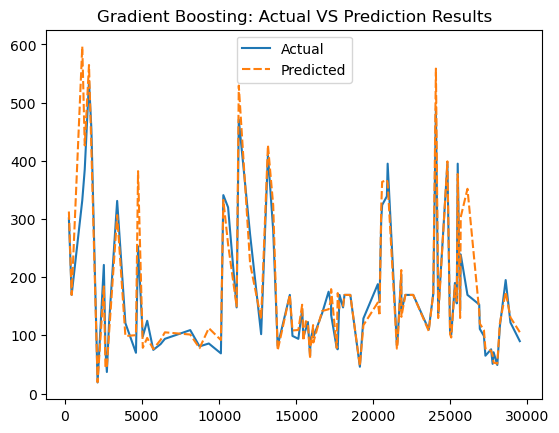

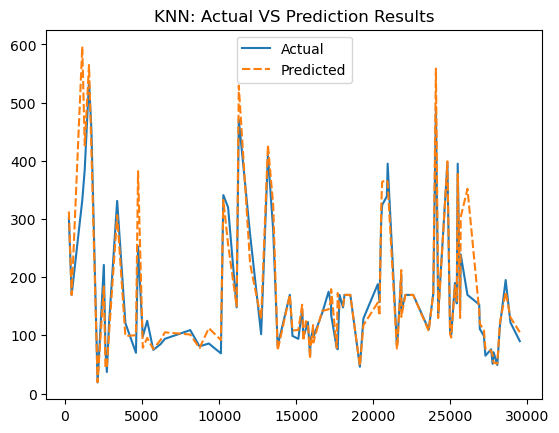

In [42]:
for model, name in zip(models, model_names):
    df=pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred[:100]})
    sns.lineplot(data=df)
    plt.title(f'{name}: Actual VS Prediction Results')
    plt.show()

In [43]:
print(mae_list,rmse_list,evs_list)

[32.604086254979514, 16.15056240678769, 22.889048462692994] [74.15427927893683, 28.849469166095886, 49.34068404783017] [0.6395282555926491, 0.9448042771586275, 0.8386610852703901]


# Performance Metrics of Regression Algorithms

**The higher the Explained variance score ,The better accuracy of the model**

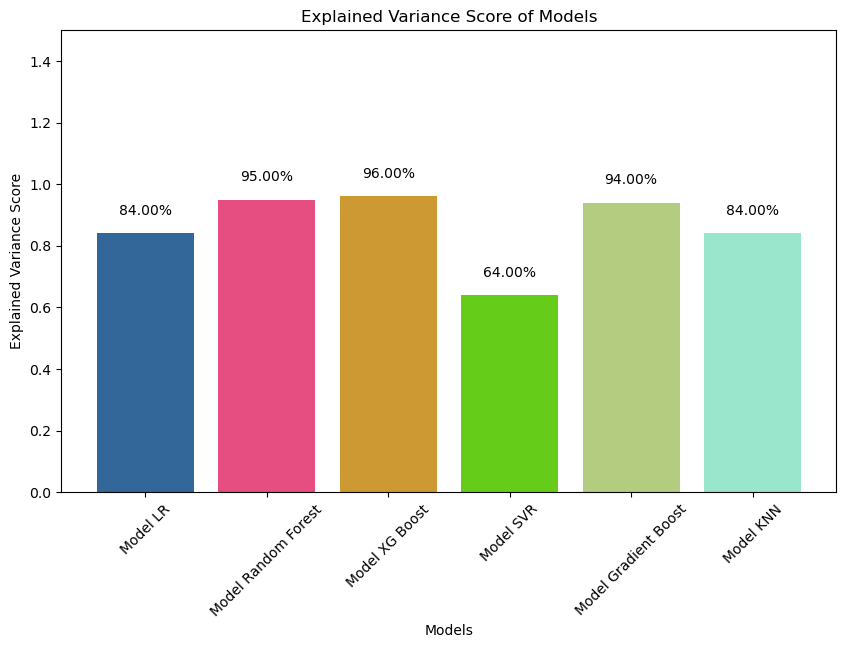

In [44]:
evs_score = [evs,evs_rf,evs_xgb]
evs_scores= evs_score+ evs_list
Scores = [round(i,2) for i in evs_scores]

model_name=['Model LR', 'Model Random Forest', 'Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Explained Variance Score')
plt.title('Explained Variance Score of Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0.0, top=1.50)

for i, score in enumerate(Scores):
    percentage = f'{score*100:.2f}%'
    plt.text(i, score+0.05, percentage, ha='center', va='bottom')

plt.show()

**This graph shows that XGBoost Regression model performs well and good with highest accuracy(explained variance score) of 96% followed by Random forest regression(95%) and Gradient Boost regression with accuracy(explained variance score) of 94% respectively.**

# MAE and RMSE of all the models

**The lower the Mean absolute error and Root mean squared error the better the accuracy of the model**

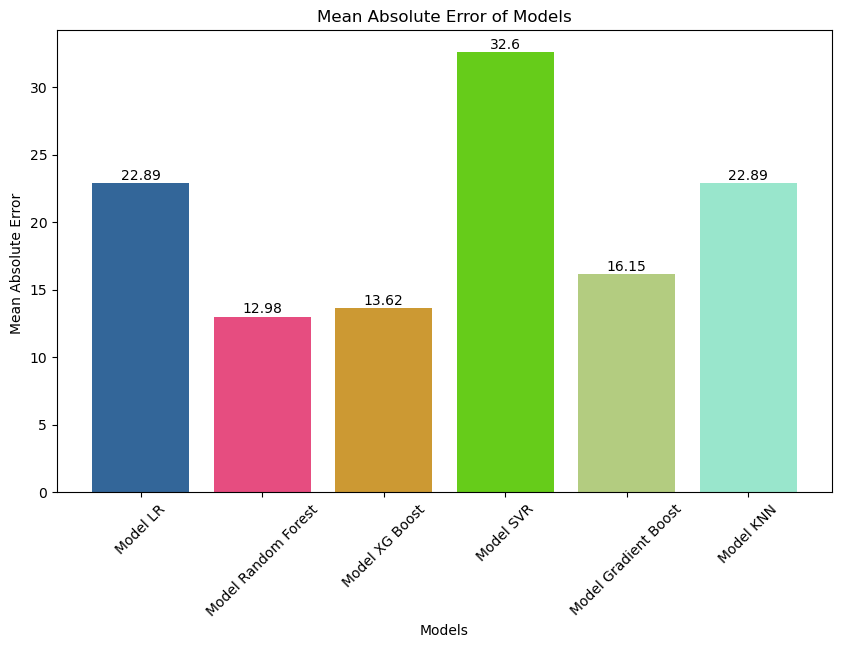

In [45]:
mae_s1 = [mae,mae_rf, mae_xgb]
mae_s= mae_s1 + mae_list
Scores_mae = [round(i,2) for i in mae_s]

model_name=['Model LR', 'Model Random Forest','Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores_mae, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error ')
plt.title('Mean Absolute Error of Models')
plt.xticks(rotation=45)

for i, score in enumerate(Scores_mae):
    plt.text(i, score+0.05,Scores_mae[i], ha='center', va='bottom')

plt.show()

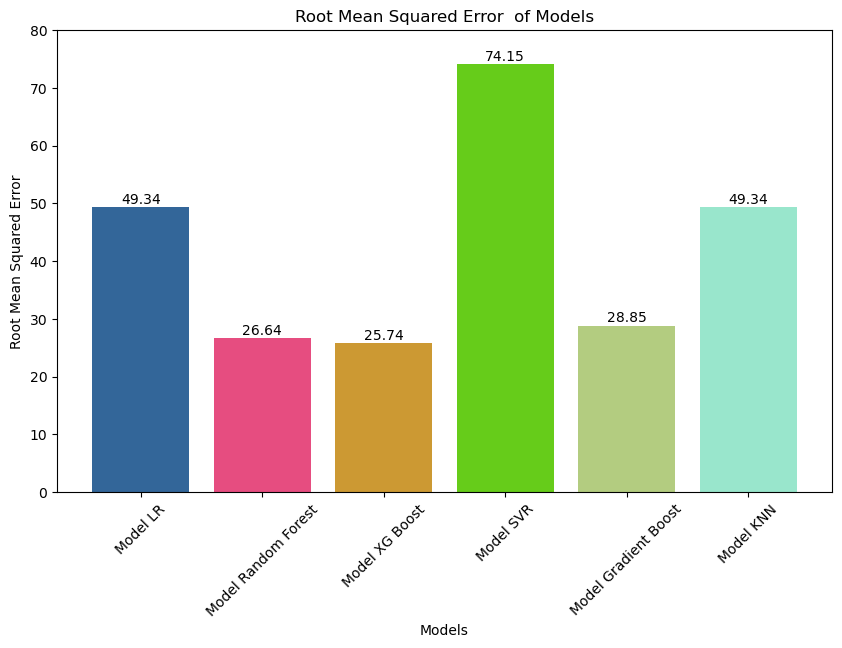

In [46]:
rmse_s1 = [rmse,rmse_rf,rmse_xgb]
rmse_s= rmse_s1 + rmse_list
Scores_rmse = [round(i,2) for i in rmse_s]

model_name=['Model LR','Model Random Forest', 'Model XG Boost', 'Model SVR', 'Model Gradient Boost','Model KNN' ]

colors= [(0.2,0.4,0.6),(0.9,0.3,0.5),(0.8,0.6,0.2), (0.4,0.8,0.1),(0.7,0.8,0.5),(0.6,0.9,0.8)]

plt.figure(figsize=(10,6))
plt.bar(model_name, Scores_rmse, color=colors)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error  of Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=80)

for i, score in enumerate(Scores_rmse):
    plt.text(i, score+0.05,Scores_rmse[i],ha='center', va='bottom')

plt.show()

In [47]:
dafr=pd.DataFrame({'Model': model_name,'MAE':Scores_mae,'RMSE':Scores_rmse,'ExpVarScore':Scores})
dafr.set_index('Model',inplace=True)
print(dafr)

                        MAE   RMSE  ExpVarScore
Model                                          
Model LR              22.89  49.34         0.84
Model Random Forest   12.98  26.64         0.95
Model XG Boost        13.62  25.74         0.96
Model SVR             32.60  74.15         0.64
Model Gradient Boost  16.15  28.85         0.94
Model KNN             22.89  49.34         0.84


**XG Boost model has the lowest MAE & RMSE score than other models**

**Therefore XGBoost Regressor performs well and good with highest accuracy(explained variance score) of 96% followed by Random forest regression(95%)**


In [48]:
import pickle

with open('ML_Model_XGB_AQI_Est.pkl','wb') as f:
    pickle.dump(model_xgb, f)

In [49]:
# Load the model from the file
with open('ML_Model_XGB_AQI_Est.pkl', 'rb') as f:
    loaded_model = pickle.load(f)